<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 147.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 190.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 136.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 169.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 178.0 MB/s eta 0:00:00


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


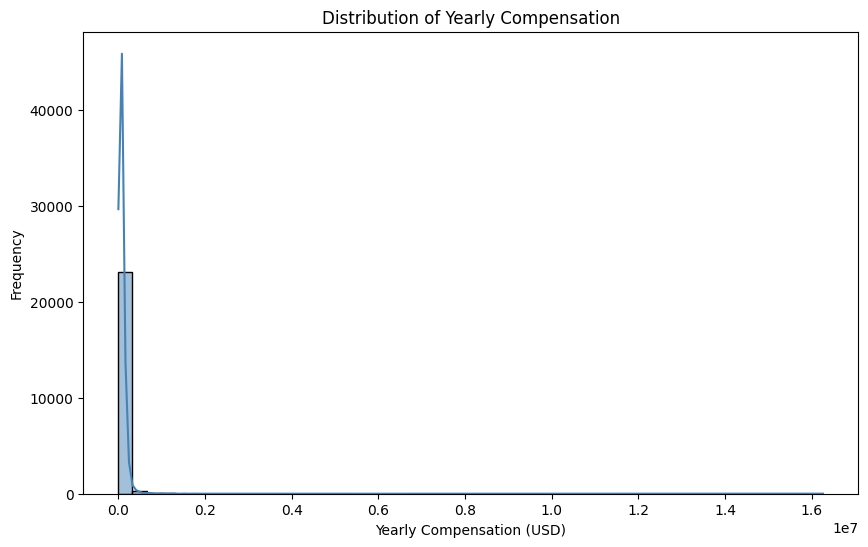

In [14]:
# Analyze and Visualize Compensation Distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True, color='steelblue')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Yearly Compensation')
plt.show()


### Interpretation of the output  
The histogram and KDE curve indicate that:

- **Most respondents earn on the lower end** of the compensation scale.  
- The density curve rises sharply near the left, showing a large concentration of lower salaries.  
- The long tail stretching to the right reflects **a small number of very high earners**, which is why the distribution is so skewed.  
- This skewness is the reason outlier detection (Step 4) removes a large number of rows on the high‑compensation side.

This visualization confirms that compensation is not normally distributed and supports your decision to use IQR‑based filtering before correlation analysis.
>the shape is dominated by a long right‑tail. Most respondents fall into the lower compensation ranges, while a small number of very high earners stretch the scale outward. This skew compresses the left side of the plot, but it accurately reflects the raw, untransformed distribution of the dataset. 

In [13]:
# # Step 3: Density Plot for Yearly Compensation

# plt.figure(figsize=(10, 6))
# sns.kdeplot(df['ConvertedCompYearly'], fill=True, color='darkgreen', linewidth=2)
# plt.xlabel('Yearly Compensation (USD)')
# plt.ylabel('Density')
# plt.title('Density Plot of Yearly Compensation')
# plt.show()


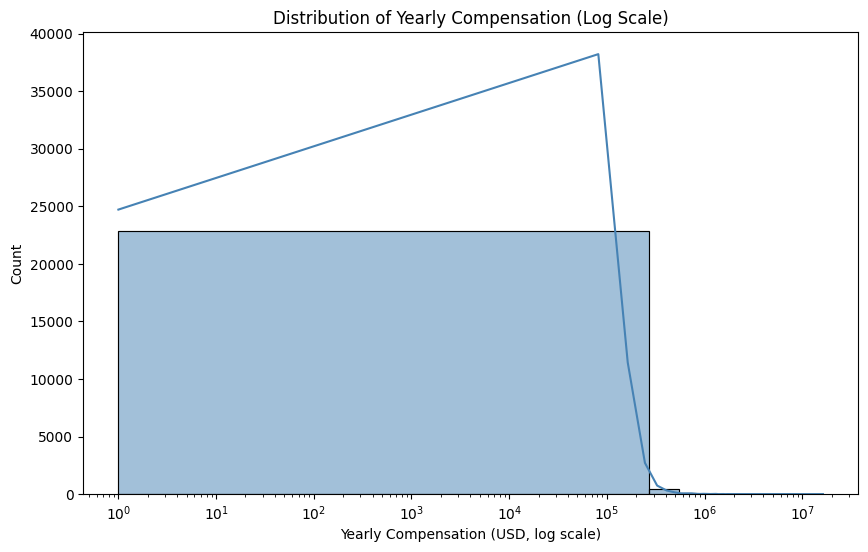

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(comp, bins=60, kde=True, color='steelblue')
plt.xscale('log')
plt.xlabel('Yearly Compensation (USD, log scale)')
plt.title('Distribution of Yearly Compensation (Log Scale)')
plt.show()


Whether zoomed to the 90–95th percentile or shown on a log scale, the distribution becomes easier to interpret because the main body of the data is no longer overshadowed by outliers. This version is useful for deeper analysis, pattern recognition, and understanding the central tendency without distortion from the extreme tail.

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [19]:
# Median Compensation for Full-Time Employees

# Filter for respondents who are employed full-time
full_time_employed = df[df['Employment'] == 'Employed, full-time']

# Calculate the median yearly compensation
median_full_time_comp = full_time_employed['ConvertedCompYearly'].median()

print("Median yearly compensation for full-time employees:", median_full_time_comp)


Median yearly compensation for full-time employees: 69814.0


Because compensation in this dataset is heavily right‑skewed, the median provides a more reliable indicator of typical full‑time earnings than the mean. This value reflects what a “typical” full‑time respondent earns after excluding the influence of extremely high salaries.

>The median aligns with the dense region of the compensation distribution before outlier removal.

<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



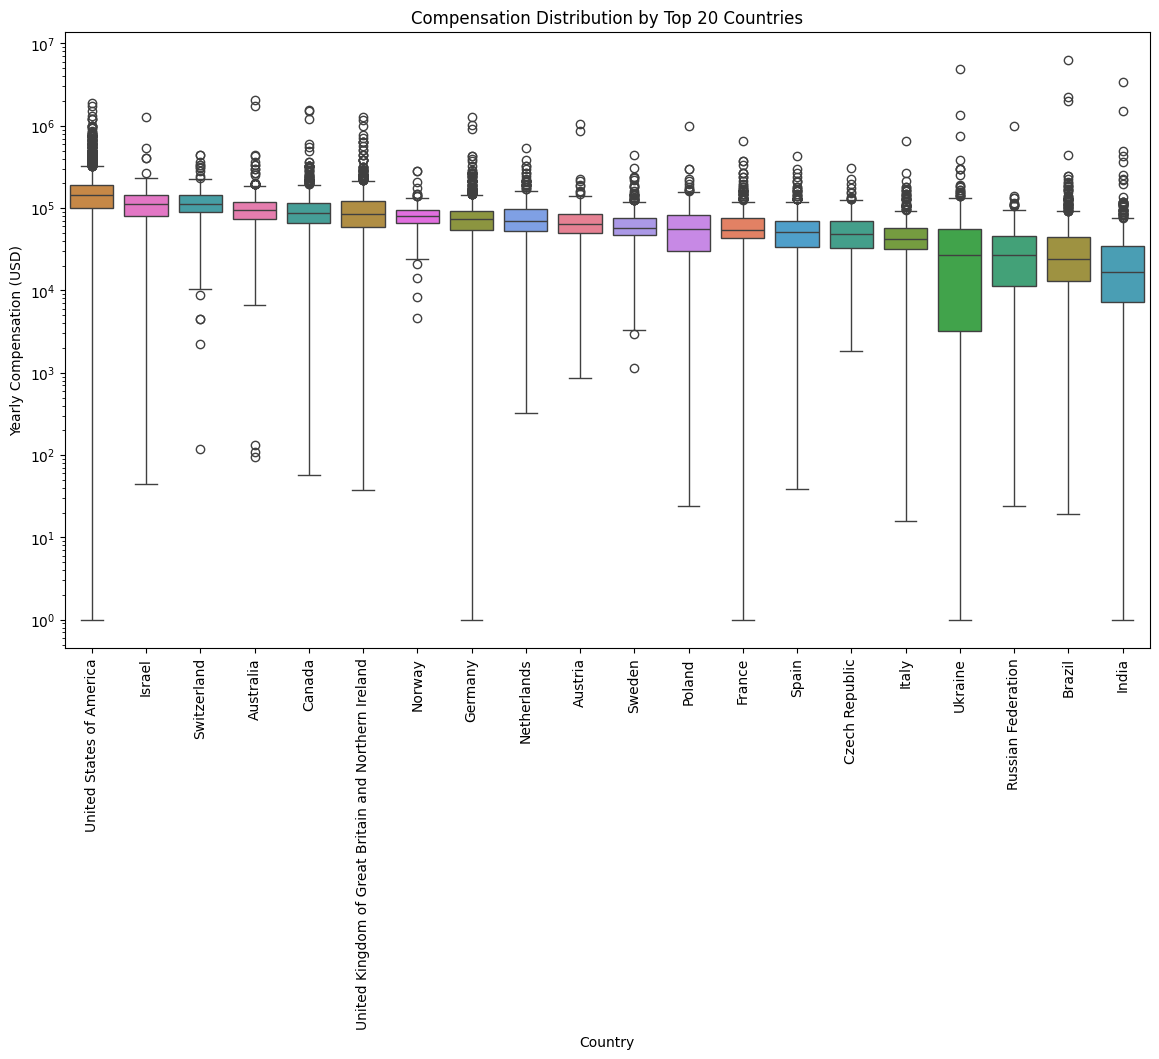

In [29]:
# Analyzing Compensation Range and Distribution by Country
# Option: Compensation Distribution by Top 20 Countries

# Keep only valid rows
df_country = df[['Country', 'ConvertedCompYearly']].dropna()

# Identify the top 20 countries by number of respondents
top_20_countries = (
    df_country['Country']
    .value_counts()
    .head(20)
    .index
)

# Filter dataset to only those countries
df_top20 = df_country[df_country['Country'].isin(top_20_countries)]

order = df_top20.groupby('Country')['ConvertedCompYearly'].median().sort_values(ascending=False).index

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top20, x='Country', y='ConvertedCompYearly', order=order, hue = 'Country')
plt.yscale('log') # Optional: Use log scale if outliers make the boxes look like flat lines
plt.xticks(rotation=90)
plt.title('Compensation Distribution by Top 20 Countries')
plt.ylabel('Yearly Compensation (USD)')
plt.xlabel('Country')
plt.show()


# # <--- OPTION TO SEE ALL COUNTRY --->
# # Keep only rows with valid compensation and country values
# df_country = df[['Country', 'ConvertedCompYearly']].dropna()

# plt.figure(figsize=(14, 8))
# sns.boxplot(data=df_country, x='Country', y='ConvertedCompYearly')
# plt.xticks(rotation=90)
# plt.title('Compensation Distribution by Country')
# plt.ylabel('Yearly Compensation (USD)')
# plt.xlabel('Country')
# plt.show()


### Note
The ordering by median, the top‑20 filter, and the log‑scaled y‑axis are all working as intended. The congestion is reduced, the countries are sorted meaningfully, and the log scale reveals structure that would otherwise be flattened.
>The box plots show clear differences in compensation levels across the top 20 countries by respondent count. Sorting by median compensation highlights which regions report higher typical earnings, while the log scale makes the wide range of values easier to compare. Countries with taller boxes or longer whiskers exhibit greater variability in compensation, suggesting more diverse job markets or wider income inequality. Outliers appear as points beyond the whiskers, indicating respondents whose compensation is unusually high relative to others in the same country.
>>This visualization provides a structured view of global compensation patterns and helps identify regions with consistently higher pay versus those with broader or lower distributions.

In [30]:
# # 1. Clean and filter
# df_country = df[['Country', 'ConvertedCompYearly']].dropna()

# # 2. Identify top 20 countries
# top_20_list = df_country['Country'].value_counts().head(20).index
# df_top20 = df_country[df_country['Country'].isin(top_20_list)].copy()

# # 3. CRITICAL IMPROVEMENT: Sort countries by Median Salary
# # This makes the trend much easier to see
# order = df_top20.groupby('Country')['ConvertedCompYearly'].median().sort_values(ascending=False).index

# plt.figure(figsize=(14, 8))

# # 4. Use 'hue' to avoid warnings and add color
# sns.boxplot(
#     data=df_top20, 
#     x='Country', 
#     y='ConvertedCompYearly', 
#     order=order, 
#     hue='Country', 
#     palette='viridis',
#     legend=False
# )

# # 5. Visual refinement
# plt.yscale('log') # Optional: Use log scale if outliers make the boxes look like flat lines
# plt.xticks(rotation=45, ha='right') # 45 degrees is easier to read than 90
# plt.title('Compensation Distribution by Top 20 Countries (Ranked by Median)', fontsize=15)
# plt.ylabel('Yearly Compensation (USD) - Log Scale')
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# plt.tight_layout()
# plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [32]:
# Step 6: Removing Outliers from the Dataset

# Keep only valid compensation values
comp_clean = df['ConvertedCompYearly'].dropna()

# Calculate IQR boundaries
Q1 = comp_clean.quantile(0.25)
Q3 = comp_clean.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a refined dataset without outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) &
                    (df['ConvertedCompYearly'] <= upper_bound)]

# print("Original dataset size:", df.shape[0])
# print("Refined dataset size:", df_no_outliers.shape[0])
# print("Outliers removed:", df.shape[0] - df_no_outliers.shape[0])

# Validate the size of the new DataFrame
print("Original dataset size:", len(df))
print("Filtered dataset size (excluding outliers):", len(df_no_outliers))
print("Rows removed as outliers:", len(df) - len(df_no_outliers))


Original dataset size: 65437
Filtered dataset size (excluding outliers): 22457
Rows removed as outliers: 42980


Removing outliers using the IQR method trims away extremely high compensation values that sit far beyond the typical earnings range. Because the compensation distribution is strongly right‑skewed, these extreme values can distort statistical relationships and inflate correlation measures. The refined dataset keeps only the central portion of the distribution, making subsequent analyses—such as correlations, regressions, or visual comparisons—more stable and representative of the majority of respondents.

<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


Correlation of ConvertedCompYearly, WorkExp, and JobSatPoints_1:

                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.408438       -0.058170
WorkExp                         0.408438  1.000000       -0.032388
JobSatPoints_1                 -0.058170 -0.032388        1.000000


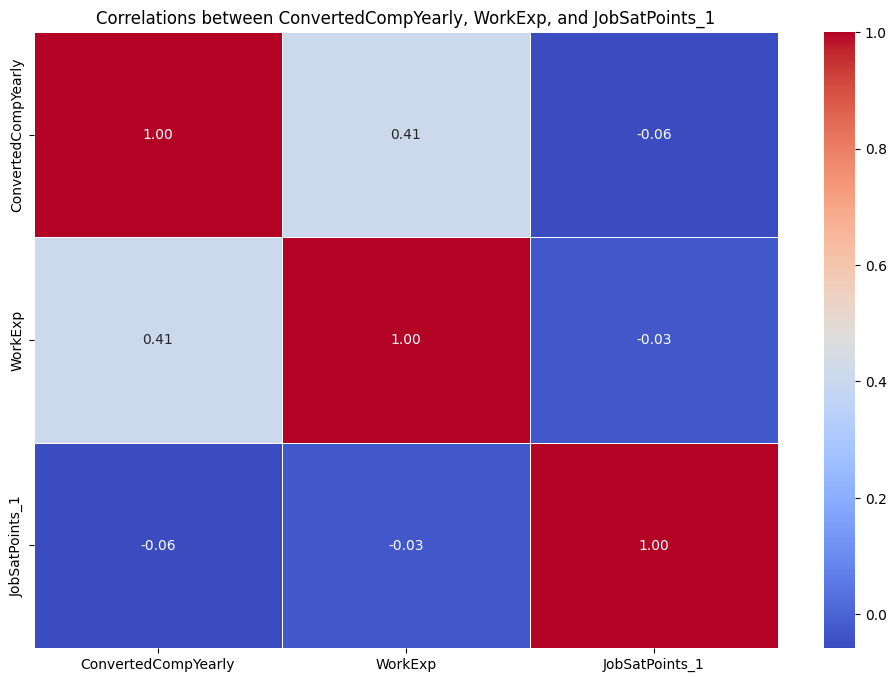

In [44]:
# # # Uncomment the following to check Value couts for proper coding
# # Show the distribution of Age values
# print("\nValue counts for transformed data:\n") 
# print(df_no_outliers['ConvertedCompYearly'].value_counts())
# print(df_no_outliers['WorkExp'].value_counts())
# print(df_no_outliers['JobSatPoints_1'].value_counts())

corr_df = df_no_outliers[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']]
corr_matrix = corr_df.corr()

# Display correlations between ConvertedCompYearly, WorkExp, and JobSatPoints_1
print("Correlation of ConvertedCompYearly, WorkExp, and JobSatPoints_1:\n")
print(corr_matrix.sort_values(by='ConvertedCompYearly', ascending=False))

# 3. Visualize the full correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt = ".2f")
plt.title('Correlations between ConvertedCompYearly, WorkExp, and JobSatPoints_1')
plt.show()


### Correlation matrix 
>It shows a moderate positive relationship between yearly compensation and work experience, indicating that respondents with more years of experience tend to earn higher salaries. The correlations involving job satisfaction are weak and slightly negative, suggesting that compensation and experience have little direct influence on satisfaction levels. These results highlight that while experience contributes meaningfully to earnings, job satisfaction is shaped by factors beyond pay and tenure.

In [48]:
# # Step 7: Finding Correlations Between Key Variables

# # Select the variables of interest from the outlier‑filtered dataset
# corr_df = df_no_outliers[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()

# # Compute the correlation matrix
# corr_matrix = corr_df.corr()

# # Display the correlation matrix
# print(corr_matrix)

# # Visualize with a heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Between Compensation, Work Experience, and Job Satisfaction')
# plt.show()


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


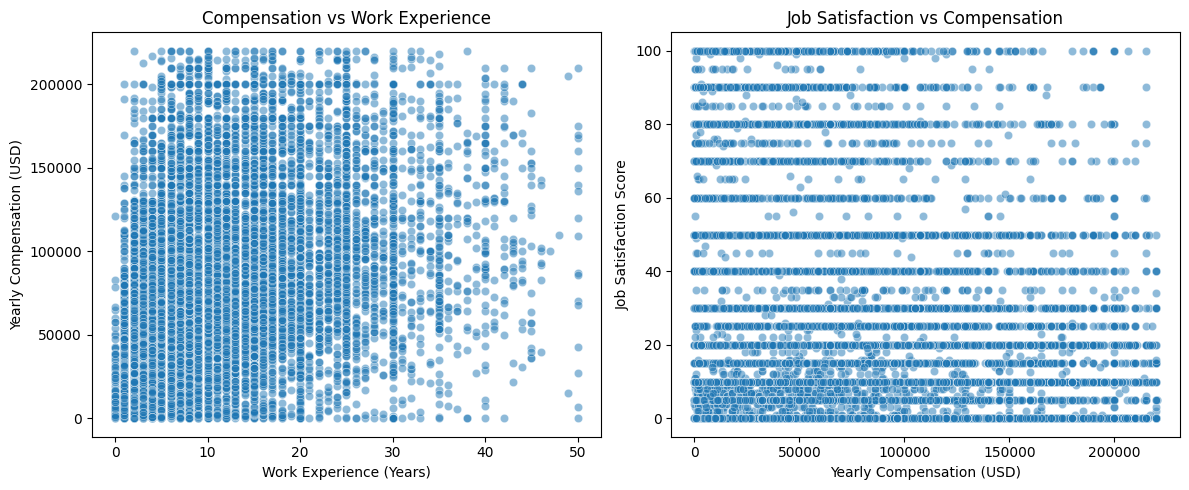

In [59]:
# Scatter Plot for Correlations

# Use the outlier‑filtered dataset
scatter_df = df_no_outliers[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()

plt.figure(figsize=(12, 5))

# Scatter: Compensation vs Work Experience
plt.subplot(1, 2, 1)
sns.scatterplot(data=scatter_df, x='WorkExp', y='ConvertedCompYearly', alpha=0.5)
plt.title('Compensation vs Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation (USD)')

# Scatter: Job Satisfaction vs Compensation
plt.subplot(1, 2, 2)
sns.scatterplot(data=scatter_df, x='ConvertedCompYearly', y='JobSatPoints_1', alpha=0.5)
plt.title('Job Satisfaction vs Compensation')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Score')

plt.tight_layout()
plt.show()


### Coclusion
>The scatter plots show that compensation rises gradually with work experience, but the relationship is loose, with wide variation at every experience level. The plot comparing compensation and job satisfaction shows no clear pattern, reflecting that satisfaction scores remain fairly independent of pay. Together, these visuals confirm the earlier correlation results: experience has a moderate influence on earnings, while job satisfaction is shaped by factors beyond compensation.

In [58]:
# # Value count and sorting check to get the maximum for tjustifying scatter 
# print(df_no_outliers['ConvertedCompYearly'].value_counts().sort_index(ascending=True))
# print(df_no_outliers['WorkExp'].value_counts().sort_index(ascending=True))
# print(df_no_outliers['JobSatPoints_1'].value_counts().sort_index(ascending=True))

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
